# 機械学習講習会 
#pythonにおける基本的な文法
## @ 虎ノ門

#### 中西均

#### 2015/ 5/ 23 (Sat)

# 謝辞
#### 企画・会場設備の提供をしてくださった
###BizJapan様, COMx様
####にこの場をお借りして御礼申し上げます。

#自己紹介

## 中西 均
#### 所属: 東大理学系研究科物理学専攻(専門:素粒子実験)
#### 趣味: 体操
#### 言語: Rails, SQL, Python, swiftを勉強中

# はじめに

## この回では、pythonの基本的な文法を紹介します。
##### pythonによる機械学習の実装に向けたデータ加工、データビジュアライゼーションを中心に扱います。

# 目次
## Pythonを使ったデータ解析
## パッケージ、モジュールの読み込み
## 基本的な文法: 型、条件文、関数
## Dataの加工処理とVisualization: Numpy,  PandasとMatplotlib
## Fileの読み書き

# Pythonを使ったデータ解析

Pythonを使ってデータ解析を行うことを考えます。

一般に次の順番で解析が進行します。

- データの取得(API, webからの取得, csv file, SQL)
- データの加工その1( <font color='red'>numpy</font> や <font color='red'>pandas</font> などを使った行列計算)
- 機械学習、データ分析(今回は <font color='red'>scikit learn</font> を用います)
- データの加工その2( <font color='red'>numpy</font> や <font color='red'>pandas</font> などを使って整形)
- データの可視化( <font color='red'>matplotlib</font> を使って表現)
- データの保存


# なぜpythonでデータ解析?
## データ = 構造化された情報
データセットには、

1. 複数の次元の配列・<font color='red'>行列</font>
1. 複数の異なる型のスプレッドシート形式のデータ(<font color='red'>csv</font>, <font color='red'>tsv</font>)
1. <font color='red'>SQL</font>などのキー列に紐付いたデータ
1. <font color='red'>時系列データ</font>

などがある。

また、初めは構造化されていないが、分析・モデル化により構造化されたデータもある。

- ニュースサイトの記事といった<font color='red'>自然言語</font>

# pythonを使う理由

複数の型のデータ

データの構造化を行うのに優れている

文字列の扱いに優れている

他の言語との互換性が良い

などの理由から、pythonが便利である。

## それではcodeを書いていきましょう。

# パッケージ、モジュールの読み込み

pythonでのパッケージ、モジュールの読み込み方法は、

import A

import A.B

import A as B

from B import A

のようにして行うことができる。
これらの表記の違いはモジュールインポート後のアクセス方法の違いに関わってくる。

In [1]:
%matplotlib inline
import math
import numpy as np
from numpy.random import *
import pandas as pd
import matplotlib.pyplot as plt  # pylabの代わりにmatplotlibのpyplotを使う。

 # pythonの基本
 ## リスト、タプル、辞書、集合
 pythonでの組み込みクラスについて見てみましょう。

##リスト
要素としてあらゆるオブジェクトを入れて、まとめて管理できる型。

要素を指定して、取り出すほか、
要素を追加削除したり、他のリストと連結、変換を行ったりすることができる。

In [2]:
years_list = [2010, 2011, 2012, 2013, 2014, 2015]
print years_list[0]
partial_years_list1 = years_list[1:]  # 1,2,3,4,5を取り出す
partial_years_list2 = years_list[3:5] # 3,4を取り出す
print partial_years_list1
print partial_years_list2
years_list.pop(0)
years_list.append(2016)
print years_list

2010
[2011, 2012, 2013, 2014, 2015]
[2013, 2014]
[2011, 2012, 2013, 2014, 2015, 2016]


# タプル
リストと同じく要素としてオブジェクトをいれて、管理できる型。

リストと同じく要素を取り出したり、連結をしたりすることができる。

違いは一度作成したオブジェクトの変更ができず、メソッドが用意されていない。

In [3]:
days_tuple = ("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")
print days_tuple[0]
partial_days_tuple = days_tuple[:3]
print partial_days_tuple

Sun
('Sun', 'Mon', 'Tue')


# 辞書
辞書型はkeyとvalueと呼ばれる2つのオブジェクトから要素が構成される。

keyを指定することでvalueを取り出すことができる。

keyには変更できない型が指定できる。(数値、文字列、tupleなど)

要素の追加、削除や、key, valueの一覧を取り出すことができる。

In [4]:
countries_dict = {"JP":u"日本", "CA":u"カナダ", "UK": u"イギリス"}
print countries_dict["JP"]
countries_dict.update({"US": u"アメリカ"})
print countries_dict.keys()

日本
['CA', 'JP', 'US', 'UK']


# 集合
集合型は重複、順序なしで要素を管理する型。
和集合や、差集合をとったり、ある要素が集合に含まれているかを調べたりすることができる。

In [5]:
Fruits_set = set(["apple", "orange", "banana", "lemon", "grape"])
Fruits_set.add("strauberry")
print Fruits_set

set(['grape', 'apple', 'strauberry', 'orange', 'lemon', 'banana'])


# 関数の定義

関数を定義することで、繰り返しの処理を簡単に行うことができる。

pythonでは、インデント(最初の空白)で関数内に入っているかを判定する。

### 条件文の書き方
pythonでの条件文は、インデント(最初の空白によって構造を決める。)

- for
- if
- while

を扱う。(switchはない。)

In [6]:
divided40_and_1 = []
for i in range(300):
    if i % 40 == 1:
        divided40_and_1.append(i)
divided40_and_1

[1, 41, 81, 121, 161, 201, 241, 281]

In [7]:
Fruits_set = set(["apple", "orange", "banana", "lemon", "grape"])

def find_fruit(item):
    if item in Fruits_set:
        print "{0} = fruit".format(item)
    else:
        print "{0} != fruit".format(item)

find_fruit("father")
find_fruit("apple")

father != fruit
apple = fruit


In [8]:
num = 0
while num < 5:
  print "num = " + str(num)
  num += 1

num = 0
num = 1
num = 2
num = 3
num = 4


# 組み込み関数
### python自体が持っている関数のことを、組み込み関数という。

range, tuple, zip, dict, format, sum, len, max, min, map, filter, reduceなど多く用意されている。

In [9]:
# リストの作成
list1 = range(10)
list2 = range(6,16)
print list1, list2 
print "The type of list1is %s \n " % type(list1)

# タプルの作成
tuple1 = tuple(list1)
print tuple1,"\n"

two_multi_list1 = zip(list1, list2)
print two_multi_list1,"\n"

# 辞書の作成
dictionary1 = dict(two_multi_list1)
print dictionary1,"\n"
print "Output of dictionary1[0] is %s \n" % dictionary1[0]

# 集合の作成
set1 = set(list1)
print set1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
The type of list1is <type 'list'> 
 
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9) 

[(0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11), (6, 12), (7, 13), (8, 14), (9, 15)] 

{0: 6, 1: 7, 2: 8, 3: 9, 4: 10, 5: 11, 6: 12, 7: 13, 8: 14, 9: 15} 

Output of dictionary1[0] is 6 

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [10]:
sum_list1 = sum(list1)
len_list1 = len(list1)
max_list2 = max(list2)
min_list2 = min(list2)
print "sum of list1 is {0}, length of list1 is {1}".format(sum_list1, len_list1)
print "max of list2 is {0}, min of list2 is {1}".format(max_list2, min_list2)

sum of list1 is 45, length of list1 is 10
max of list2 is 15, min of list2 is 6


In [11]:
double_list1 = map(lambda x: 2*x, list1)
print "converted list1:{0} to double list1:{1}".format(list1, double_list1)

converted list1:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] to double list1:[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [12]:
filter_more3_list1 = filter(lambda x: x>3, list1)
print filter_more3_list1

[4, 5, 6, 7, 8, 9]


In [13]:
sum_list2 = reduce(lambda x,y:x + y, list2)
print sum_list2

105


# Numpy
Numerical pythonの略で、数値計算用ライブラリ。

- 内部でCによるインプリメントが施されているため、高速で計算処理を行うことができる。(数学的演算が多種多様)
- Numpy.ndarrayというndarray型を使い、多次元配列を扱うことができる。
- 配列ベースでデータをやりとりできる。

さて、ここでまずnumpy.randomを使って乱数を作成してみましょう。

(from numpy.random import *でインポートした。)

In [14]:
Random_datum = rand(20)
print Random_datum
print type(Random_datum)

[ 0.50210383  0.58773108  0.24262249  0.48675034  0.12216826  0.54571213
  0.67866345  0.86904645  0.09359963  0.0175831   0.42547682  0.55386375
  0.74313655  0.26649235  0.87460878  0.70475664  0.94931106  0.35947264
  0.19649566  0.57853857]
<type 'numpy.ndarray'>


### 2000年から2016年までのランダムな年が入った20個の配列を作る。 

In [15]:
randint(2000, 2016, 20)

array([2001, 2004, 2008, 2008, 2006, 2009, 2000, 2008, 2015, 2000, 2008,
       2002, 2002, 2002, 2006, 2004, 2011, 2006, 2003, 2004])

### 整数0~9が入った7×7の行列を作る。

In [16]:
matrix77 = randint(0,10,(7,7))
print matrix77
print type(matrix77)

[[5 6 1 0 5 5 1]
 [9 8 6 7 8 6 0]
 [7 7 2 8 9 9 7]
 [4 1 2 7 6 1 1]
 [4 8 1 6 3 4 9]
 [3 2 5 7 3 0 8]
 [1 1 9 8 5 4 2]]
<type 'numpy.ndarray'>


# Numpyを使ったデータ加工の例

## ものの測定データ
得られた1000個のデータが正規分布に従っていると仮定して、計算をしてみましょう。

In [17]:
# 平均30,分散10の正規分布に従って、randomな数を1000個作成。
normal_datum = normal(30,10, 1000)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   3.,
          4.,  12.,  13.,  16.,  21.,  20.,  39.,  41.,  36.,  40.,  50.,
         67.,  55.,  53.,  57.,  54.,  64.,  59.,  48.,  59.,  34.,  33.,
         30.,  21.,  20.,  14.,  11.,   6.,   7.,   4.,   2.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([-10.68237352,  -9.09551878,  -7.50866404,  -5.9218093 ,
         -4.33495456,  -2.74809983,  -1.16124509,   0.42560965,
          2.01246439,   3.59931912,   5.18617386,   6.7730286 ,
          8.35988334,   9.94673808,  11.53359281,  13.12044755,
         14.70730229,  16.29415703,  17.88101177,  19.4678665 ,
         21.05472124,  22.64157598,  24.22843072,  25.81528545,
         27.40214019,  28.98899493,  30.57584967,  32.16270441,
         33.74955914,  35.33641388,  36.92326862,  38.51012336,
         40.0969781 ,  41.68383283,  43.27068757,  44.85754231,
         46.44439705,  48.03125178,  49.61810652,  51.20496126,
         52.791816

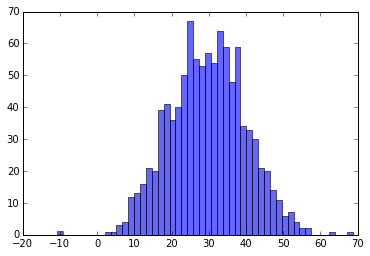

In [18]:
plt.hist(normal_datum, bins=50, alpha=0.6)
#plt.show()

そこで平均の推定量は次のように計算される。

$$ \bar{x} = \hat{\mu} = \frac{1}{n} \sum x_i $$

同様に標準偏差の推定量は次のように計算される。

$$ \hat{\sigma} = \frac{\sum (x_i - \bar{x})^2}{n -1} $$

推定量の標準偏差について、
$$ \sigma(\bar{x}) = \frac{\sigma}{\sqrt{n}} $$
が言えて、
$$ \sigma(\bar{x}) = \frac{\hat{\sigma}}{\sqrt{n}} $$
と計算して求めることができる。

In [19]:
mean = round(np.mean(normal_datum,dtype=np.float32),3)
std = round(np.std(normal_datum, ddof=1,dtype=np.float32), 5)
mean_std = round(std/math.sqrt(15), 5)
print "Mean={0}, STD={1},Mean_STD={2}".format(mean, std, mean_std)
print "よって平均値の推定は、{0}±{2}, 分散の推定値は{1} \n真の値である平均値30,分散10とconsistent".format(mean, std, mean_std)

Mean=29.681, STD=10.13732,Mean_STD=2.61744
よって平均値の推定は、29.681±2.61744, 分散の推定値は10.13732 
真の値である平均値30,分散10とconsistent


# Pandasを使ったData加工

<font color='red'>DataFrame</font>と呼ばれる2次元表型のデータ構造オブジェクト

と、

<font color='red'>Series</font>と呼ばれる時系列を扱うオブジェクト

が主に使われる。

## DataFrameの接続
pandasのdataframeでは、SQL(リレーショナルデータベース)と同じく、tableのmargeを行うことができる。

In [20]:
left = pd.DataFrame({'key1': ['Japan', 'Japan', 'America'],
                  'key2': ['Shinji', 'Asuka', 'Bob'],
                  'lval': [1, 2, 3]})
left

,key1,key2,lval
0,Japan,Shinji,1
1,Japan,Asuka,2
2,America,Bob,3


In [21]:
right = pd.DataFrame({'key1': ['Japan', 'Japan', 'America', 'America'],
                   'key2': ['Shinji', 'Asuka', 'Alice', 'Bob'],
                   'rval': [400, 500, 600, 700]})
right

,key1,key2,rval
0,Japan,Shinji,400
1,Japan,Asuka,500
2,America,Alice,600
3,America,Bob,700


In [22]:
OuterJoinDF = pd.merge(left, right, how='outer')
OuterJoinDF

,key1,key2,lval,rval
0,Japan,Shinji,1,400
1,Japan,Asuka,2,500
2,America,Bob,3,700
3,America,Alice,NaN,600


In [23]:
InnerJoinDF = pd.merge(left, right, how='inner')
InnerJoinDF

,key1,key2,lval,rval
0,Japan,Shinji,1,400
1,Japan,Asuka,2,500
2,America,Bob,3,700


2015-05-24    1.013304
2015-05-25   -0.225646
2015-05-26    0.522791
2015-05-27   -0.055503
2015-05-28    0.074971
2015-05-29    0.895310
2015-05-30   -0.672912
2015-05-31   -0.828359
2015-06-01    1.939652
2015-06-02   -0.315643
2015-06-03   -1.122540
2015-06-04   -1.812359
2015-06-05    0.682101
2015-06-06    0.481820
2015-06-07   -1.888776
...
2016-06-12    1.217181
2016-06-13    1.496310
2016-06-14    2.022289
2016-06-15   -0.195035
2016-06-16    0.007667
2016-06-17    1.077736
2016-06-18   -0.128187
2016-06-19    0.397077
2016-06-20   -0.714199
2016-06-21    0.101783
2016-06-22   -0.271566
2016-06-23    0.224525
2016-06-24    0.843718
2016-06-25    0.240043
2016-06-26    0.249862
Freq: D, Length: 400


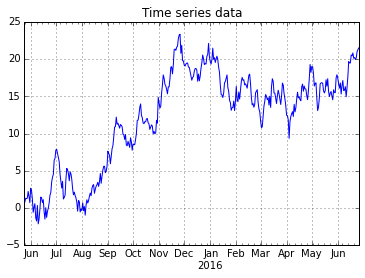

In [24]:
time_series = pd.Series(randn(400), index=pd.date_range('5/24/2015', periods=400))
print time_series
time_series_cum = time_series.cumsum()
time_series_cum.plot()
plt.title("Time series data")

          a         b         c         d         e
0  0.938561  0.856733  0.284404  0.375991  0.664792
1  0.726336  0.536399  0.928436  0.118447  0.349633
2  0.250171  0.633586  0.356628  0.732048  0.643241
3  0.350309  0.658359  0.451983  0.231491  0.991700
4  0.446681  0.709195  0.069522  0.938172  0.321915
5  0.612559  0.118279  0.212633  0.953401  0.687659
6  0.004280  0.114359  0.509160  0.218073  0.851377
7  0.614764  0.409550  0.215166  0.705955  0.885504


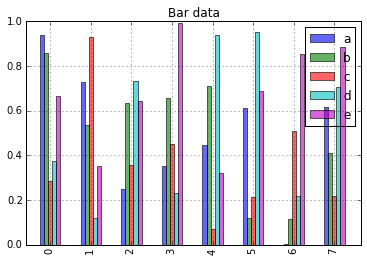

In [25]:
df1 = pd.DataFrame(rand(8, 5), columns=['a', 'b', 'c', 'd', 'e'])
print df1
df1.plot(kind='bar', alpha=0.6)
plt.title("Bar data")

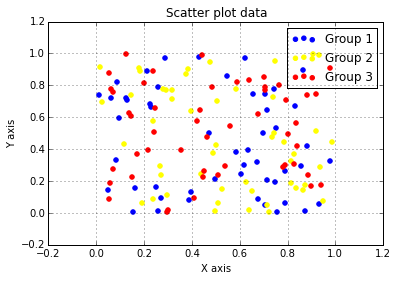

In [26]:
df = pd.DataFrame(rand(50, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])
ax1 = df.plot(kind='scatter', x='a', y='b',color='Blue', label='Group 1')
ax2 = df.plot(kind='scatter', x='c', y='d', color='Yellow', label='Group 2',ax=ax1)
df.plot(kind='scatter', x='e', y='f', color='Red', label='Group 3', ax=ax2)
plt.title("Scatter plot data")
plt.xlabel('X axis')
plt.ylabel('Y axis')

# dataの読み書き
### pandasから読み書きする方法が分かりやすい。
csv fileとtsv fileで使うと互換性がよい。

### データを書き込み

In [27]:
df1.to_csv('bar_data.csv', index=0)
df1.to_csv( 'bar_data.tsv', sep='\t', index=0)

### データの読み込み

In [28]:
df1 = pd.read_csv('bar_data.csv')
df1

,a,b,c,d,e
0,0.938561,0.856733,0.284404,0.375991,0.664792
1,0.726336,0.536399,0.928436,0.118447,0.349633
2,0.250171,0.633586,0.356628,0.732048,0.643241
3,0.350309,0.658359,0.451983,0.231491,0.991700
4,0.446681,0.709195,0.069522,0.938172,0.321915
5,0.612559,0.118279,0.212633,0.953401,0.687659
6,0.004280,0.114359,0.509160,0.218073,0.851377
7,0.614764,0.409550,0.215166,0.705955,0.885504


これでこの回は終わります。
それでは後半機械学習を実践してみましょう。